William Austin<br>
Prakash Dhimal<br>
George Mason University<br>
CS 584 Theory and Applications of Data Mining<br>
Semester project: Predicting the Impact of COVID-19

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn

In [3]:
def get_raw_data():
    confirmed_df = pd.read_csv(
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    recovered_df = pd.read_csv(
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
    death_df = pd.read_csv(
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    return confirmed_df, recovered_df, death_df

In [4]:
def get_country_data_running_total(data, columnName, countryName):
    country_data = data.loc[data['Country/Region'] == countryName]
    country_time_series_only = country_data.drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1)
    transposed = country_time_series_only.transpose()
    transposed = pd.DataFrame({
        columnName: transposed.sum(axis=1)
    })
    return transposed

In [5]:
def find_first_nonzero_index(data):
  index = 0
  for i in range(0, len(data)):
    if data[i] != 0:
      return i
  return index

In [6]:
def get_country_data(data, columnName, countryName):
    country_data = data.loc[data['Country/Region'] == countryName]
    country_time_series_only = country_data.drop(["Country/Region", "Lat", "Long"], axis=1)
    transposed = country_time_series_only.transpose()
    transposed = pd.DataFrame({
        columnName: transposed.sum(axis=1)
    })
    return transposed

In [7]:
def get_country_confirmed_recovered_death_running_total_data(confirmed_df, recovered_df, death_df, countryName):
    country_confirmed = get_country_data_running_total(confirmed_df, "Confirmed", countryName)
    country_recovered = get_country_data_running_total(recovered_df, "Recovered", countryName)
    country_death = get_country_data_running_total(death_df, "Death", countryName)
    country_all = country_confirmed
    country_all["Recovered"] = country_recovered.Recovered
    country_all["Death"] = country_death.Death
    return country_all

In [8]:
def get_US_running_total(confirmed_df, recovered_df, death_df):
    us_data = get_country_confirmed_recovered_death_running_total_data(
        confirmed_df,
        recovered_df,
        death_df,
        "US")
    return us_data

In [9]:
def get_China_running_total(confirmed_df, recovered_df, death_df):
    us_data = get_country_confirmed_recovered_death_running_total_data(
        confirmed_df,
        recovered_df,
        death_df,
        "China")
    return us_data

In [10]:
confirmed_df, recovered_df, death_df = get_raw_data()
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,850,856,868,872,876,880,898,916,933,946
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,752,754,755,755,758,760,761,761,761,761
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,43,43,45,45,45,45,48,48,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,208,208,208,208,208,220,235,235,235,235
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,34,34,51,56,65,70,85,106,122,128
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,8,11,11,11,11,11,11,11,11,11
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,522,612,612,661,729,801,907,1118,1322,1524


In [11]:
china_df = get_China_running_total(confirmed_df, recovered_df, death_df)
china_df

,Confirmed,Recovered,Death
1/22/20,548,28,17
1/23/20,643,30,18
1/24/20,920,36,26
1/25/20,1406,39,42
1/26/20,2075,49,56
...,...,...,...
5/13/20,84024,79246,4637
5/14/20,84029,79261,4637
5/15/20,84038,79281,4637
5/16/20,84044,79293,4638


Group the data by country

In [12]:
confirmed = confirmed_df.groupby('Country/Region').sum()
confirmed

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,...,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,850,856,868,872,876,880,898,916,933,946
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,752,754,755,755,758,760,761,761,761,761
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,43,43,45,45,45,45,48,48,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,375,375,375,375,375,375,375,375,376,381
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,34,34,51,56,65,70,85,106,122,128


In [13]:
recovered = recovered_df.groupby('Country/Region').sum()
recovered

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,...,472,502,558,558,610,648,691,745,745,778
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,620,627,650,654,682,688,694,705,714,715
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,2467,2546,2678,2841,2998,3058,3158,3271,3409,3507
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,537,545,550,550,568,576,596,604,615,617
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,11,13,13,13,13,14,14,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,228,228,263,301,308,310,310,315,329,335
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,...,5,5,5,6,6,6,6,6,6,6
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [14]:
death = death_df.groupby('Country/Region').sum()
death

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,...,109,115,120,122,127,132,136,153,168,169
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,488,494,502,507,515,522,529,536,542,548
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,47,48,48,48,48,49,49,49,51,51
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,7,7,8,9,10,12,12,15,18,20


In [15]:
display(confirmed.T.describe())
print('Confirmed cases global mean: \n', round(confirmed.T.describe().T['mean'].mean()))

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,848.638655,272.969089,1417.770534,292.092673,11.400598,8.892978,1563.966111,799.311826,2882.789015,6482.740053,...,57533.631136,251.182449,647.327418,126.275917,132.235294,137.119205,2.145628,8.042598,62.746778,10.957983
std,1560.297917,329.794924,2024.965220,328.696278,15.330847,12.674458,2212.070457,1153.505883,3084.427454,6944.863193,...,80257.074533,280.293528,929.602219,154.722858,120.026177,152.663772,3.696760,23.292431,139.272194,14.727695
min,0.000000,0.000000,0.000000,0.000000,-11.202700,-61.796400,-63.616700,0.000000,-255.969500,0.000000,...,-482.924700,-55.765800,0.000000,-66.589700,0.000000,0.000000,-12.885800,0.000000,-15.416700,-20.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,...,9.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,64.000000,87.000000,53.000000,1.000000,1.000000,97.000000,115.000000,791.000000,2013.000000,...,2716.000000,94.000000,41.377500,42.000000,91.000000,44.000000,0.000000,0.000000,2.000000,1.000000
75%,919.500000,543.500000,2476.000000,700.000000,21.500000,23.000000,2713.500000,1224.500000,6545.000000,14633.000000,...,112541.500000,512.500000,1447.500000,215.500000,268.000000,310.000000,6.000000,1.000000,54.500000,25.000000
max,6664.000000,946.000000,7019.000000,761.000000,48.000000,25.000000,8068.000000,4472.000000,7054.000000,16242.000000,...,244995.000000,734.000000,2753.000000,541.000000,320.000000,381.000000,24.215500,128.000000,753.000000,44.000000


Confirmed cases global mean: 
 6346.0


In [16]:
display(recovered.T.describe())
print('\n')
print('Recovered cases global mean: ', round(recovered.T.describe().T['mean'].mean()))

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,101.579832,158.019509,578.510029,125.781749,2.988834,3.153482,432.453506,293.975692,1671.688175,4037.185431,...,280.782397,136.812701,333.251788,54.662471,84.344538,48.043575,1.204451,0.740077,22.948459,1.680672
std,194.119284,230.638607,961.071282,202.869883,5.007566,8.857859,675.753846,493.605335,2429.287806,5609.902022,...,373.681191,194.896158,646.327425,73.761649,96.190263,83.226987,3.295864,4.652819,41.223085,4.717319
min,0.000000,0.000000,0.000000,0.000000,-11.202700,-61.796400,-63.616700,0.000000,-255.969500,0.000000,...,-482.924700,-55.765800,0.000000,-66.589700,0.000000,0.000000,-12.885800,0.000000,-15.416700,-20.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,...,8.000000,0.000000,0.000000,0.000000,10.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,28.033900,1.000000,0.000000,0.000000,3.000000,1.000000,26.000000,9.000000,...,67.000000,0.000000,0.000000,0.000000,16.000000,17.000000,0.000000,0.000000,0.000000,0.000000
75%,105.500000,292.500000,870.000000,198.000000,6.000000,3.000000,675.500000,462.500000,3966.000000,9959.000000,...,517.000000,296.000000,175.000000,112.000000,199.500000,69.000000,0.000000,0.000000,31.500000,2.000000
max,778.000000,715.000000,3507.000000,617.000000,17.873900,19.000000,2569.000000,1925.000000,6392.000000,14563.000000,...,1058.000000,564.000000,2247.000000,241.000000,260.000000,335.000000,24.215500,48.516388,188.000000,30.000000




Recovered cases global mean:  1915.0


In [17]:
display(death.T.describe())
print('\n')
print('Fatality cases global mean: ', round(death.T.describe().T['mean'].mean()))

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,24.857143,11.826232,151.283139,15.159900,0.896397,0.573650,72.520733,11.555524,38.041116,191.454339,...,8423.126934,4.232869,3.638343,3.250707,1.042017,1.329289,0.095208,1.731673,1.385434,1.453782
std,42.058935,13.231653,200.342031,19.136932,2.157677,6.100643,110.704804,16.782226,110.959229,247.041642,...,11999.253855,9.512442,7.687262,7.936704,9.996097,4.336529,2.523375,5.752584,3.559670,3.693209
min,0.000000,0.000000,0.000000,0.000000,-11.202700,-61.796400,-63.616700,0.000000,-255.969500,0.000000,...,-482.924700,-55.765800,0.000000,-66.589700,0.000000,0.000000,-12.885800,0.000000,-15.416700,-20.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,11.000000,0.000000,0.000000,0.000000,3.000000,0.000000,7.000000,8.000000,...,195.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,26.000000,365.500000,35.500000,2.000000,3.000000,126.000000,21.000000,67.000000,437.000000,...,17469.000000,9.000000,5.000000,9.000000,0.000000,2.000000,0.000000,0.000000,2.500000,3.000000
max,169.000000,41.153300,548.000000,51.000000,17.873900,17.060800,373.000000,60.000000,1129.862300,629.000000,...,34716.000000,20.000000,64.585300,16.000000,108.000000,35.233200,24.215500,48.516388,28.283300,30.000000




Fatality cases global mean:  423.0


See the confirmed cases, sorted by country

In [18]:
confirmed.sort_values(confirmed.columns[-1], ascending=False)[:20][confirmed.columns[-1]]

Country/Region
US                1486757
Russia             281752
United Kingdom     244995
Brazil             241080
Spain              230698
Italy              225435
France             179693
Germany            176369
Turkey             149435
Iran               120198
India               95698
Peru                92273
China               84054
Canada              78332
Belgium             55280
Saudi Arabia        54752
Mexico              49219
Netherlands         44195
Chile               43781
Pakistan            40151
Name: 5/17/20, dtype: int64

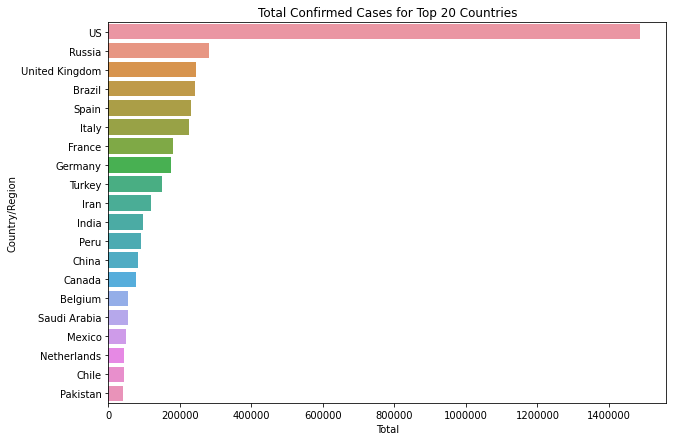

In [19]:
plt.figure(figsize=(10,7))
top_20_confirmed = confirmed.sort_values(confirmed.columns[-1], ascending=False)[:20][confirmed.columns[-1]]
seaborn.barplot(x=top_20_confirmed, y=top_20_confirmed.index)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Total')
plt.title('Total Confirmed Cases for Top 20 Countries')
plt.show()

In [20]:
recovered.sort_values(recovered.columns[-1], ascending=False)[:20][recovered.columns[-1]]


Country/Region
US              272265
Germany         154011
Spain           146446
Italy           125176
Turkey          109962
Iran             94464
Brazil           94122
China            79306
Russia           67373
France           61327
Canada           38563
India            36795
Mexico           33329
Peru             28621
Switzerland      27500
Saudi Arabia     25722
Ireland          19470
Chile            19213
Belgium          14630
Austria          14563
Name: 5/17/20, dtype: int64

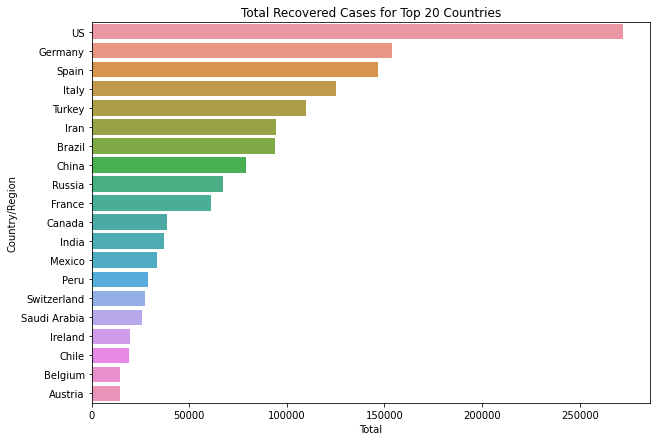

In [21]:
plt.figure(figsize=(10,7))
top_20_recovered = recovered.sort_values(recovered.columns[-1], ascending=False)[:20][recovered.columns[-1]]
ax = seaborn.barplot(x=top_20_recovered, y=top_20_recovered.index)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Total')
plt.title('Total Recovered Cases for Top 20 Countries')
plt.show()

In [22]:
death.sort_values(death.columns[-1], ascending=False)[:20][death.columns[-1]]


Country/Region
US                89562
United Kingdom    34716
Italy             31908
France            28111
Spain             27563
Brazil            16118
Belgium            9052
Germany            7962
Iran               6988
Canada             5903
Netherlands        5699
Mexico             5177
China              4638
Turkey             4140
Sweden             3679
India              3025
Ecuador            2736
Peru               2648
Russia             2631
Switzerland        1881
Name: 5/17/20, dtype: int64

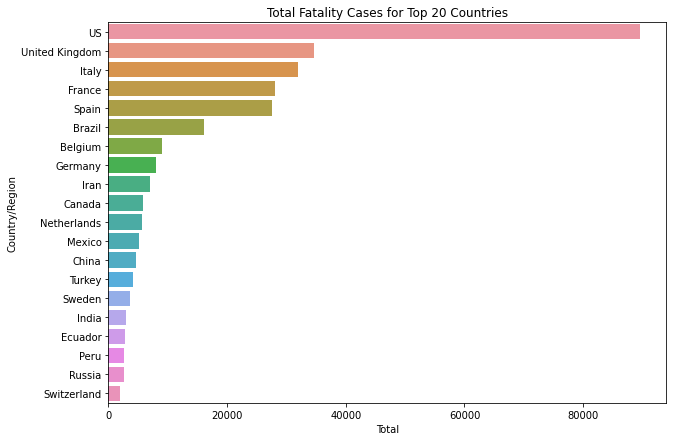

In [23]:
plt.figure(figsize=(10,7))
top_20_fatality = death.sort_values(death.columns[-1], ascending=False)[:20][death.columns[-1]]
ax = seaborn.barplot(x=top_20_fatality, y=top_20_fatality.index)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Total')
plt.title('Total Fatality Cases for Top 20 Countries')
plt.show()

US has the highest number of cases, recovered and death

In [24]:
us_only = get_US_running_total(confirmed_df, recovered_df, death_df)
us_only

,Confirmed,Recovered,Death
1/22/20,1,0,0
1/23/20,1,0,0
1/24/20,2,0,0
1/25/20,2,0,0
1/26/20,5,0,0
...,...,...,...
5/13/20,1390406,243430,84119
5/14/20,1417774,246414,85898
5/15/20,1442824,250747,87530
5/16/20,1467820,268376,88754


Looking at the daily changes

In [25]:
daily_changes = us_only.diff().dropna()
daily_changes[-14:]

,Confirmed,Recovered,Death
5/4/20,22335.0,7028.0,1240.0
5/5/20,23976.0,2611.0,2142.0
5/6/20,24980.0,119.0,2391.0
5/7/20,27692.0,5126.0,2207.0
5/8/20,26906.0,3957.0,1518.0
5/9/20,25621.0,13541.0,1615.0
5/10/20,19710.0,3635.0,731.0
5/11/20,18621.0,16564.0,1156.0
5/12/20,21495.0,-2446.0,1674.0
5/13/20,21030.0,13143.0,1763.0


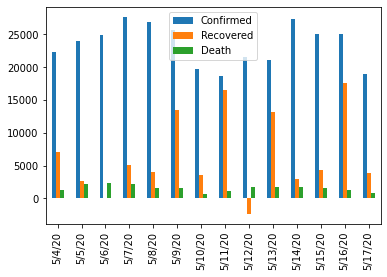

In [26]:
daily_changes[-14:].plot(kind='bar')

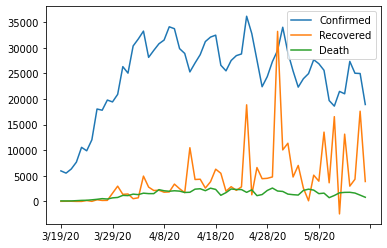

In [27]:
daily_changes[-60:].plot()

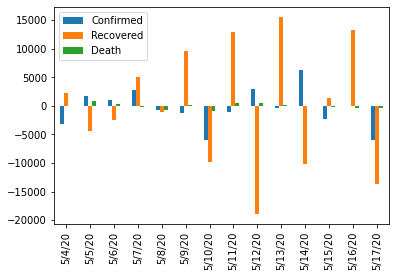

In [28]:
daily_changes.diff()[-14:].plot(kind='bar')

Adding 14 days rolling average for new confirmed cases.

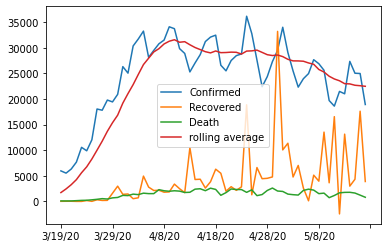

In [29]:
daily_changes['rolling average'] = daily_changes.Confirmed.rolling(7).mean()
daily_changes = daily_changes.dropna()
daily_changes[-60:].plot()

In [30]:
daily_changes[-14:]

,Confirmed,Recovered,Death,rolling average
5/4/20,22335.0,7028.0,1240.0,27454.000000
5/5/20,23976.0,2611.0,2142.0,27395.571429
5/6/20,24980.0,119.0,2391.0,27060.285714
5/7/20,27692.0,5126.0,2207.0,26799.857143
5/8/20,26906.0,3957.0,1518.0,25781.142857
5/9/20,25621.0,13541.0,1615.0,25287.285714
5/10/20,19710.0,3635.0,731.0,24460.000000
5/11/20,18621.0,16564.0,1156.0,23929.428571
5/12/20,21495.0,-2446.0,1674.0,23575.000000
5/13/20,21030.0,13143.0,1763.0,23010.714286


In [31]:
daily_changes['rolling average'].diff()[-14:]

5/4/20      -11.000000
5/5/20      -58.428571
5/6/20     -335.285714
5/7/20     -260.428571
5/8/20    -1018.714286
5/9/20     -493.857143
5/10/20    -827.285714
5/11/20    -530.571429
5/12/20    -354.428571
5/13/20    -564.285714
5/14/20     -46.285714
5/15/20    -265.142857
5/16/20     -89.285714
5/17/20    -110.428571
Name: rolling average, dtype: float64

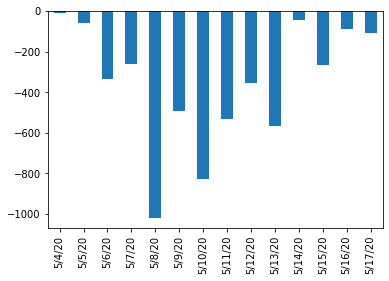

In [32]:
daily_changes['rolling average'].diff()[-14:].plot(kind='bar')

#### SIR Model

In [33]:
# total number of cases so far
confirmed_so_far = us_only.Confirmed[-1]
death_so_far = us_only.Death[-1]
recovered_so_far = us_only.Recovered[-1]
print("Confirmed so far: ", confirmed_so_far)
print("Recovered so far: ", recovered_so_far)
print("Death so far: ", death_so_far)
print("Active cases: ", confirmed_so_far - death_so_far - recovered_so_far)

Confirmed so far:  1486757
Recovered so far:  272265
Death so far:  89562
Active cases:  1124930


US population
N = 328.2 million (2019)

In [34]:
N = 328200000

Initialize the SIR initial values

 * S - Susceptible
 * I - Infected
 * R - Removed (Recovered + death)

In [35]:
# The number of infected people (so far)
I_initial = confirmed_so_far

# removed = recovered + death (so far)
R_initial = recovered_so_far + death_so_far

# anyone that has not been infected, recovered, or died from COVID-19
S_initial = N - I_initial - R_initial

print("Susceptible initial: ", S_initial)
print("Removed initial: ", R_initial)
print("Infected initial: ", I_initial)

print("Susceptible (%): ", S_initial/N * 100)
print("Removed (%): ", R_initial/N * 100)
print("Infected (%): ", I_initial/N * 100)

Susceptible initial:  326351416
Removed initial:  361827
Infected initial:  1486757
Susceptible (%):  99.43675076173065
Removed (%):  0.11024588665447899
Infected (%):  0.453003351614869


We probably need to modify N, since the susceptible % is really high.

Maybe not

### Variables

We need few variables here:
  * transmission rate: how quickly people are getting infected
    * how fast does our S turns into I
    * we can also call this infection rate
  * recovery rate: how quickly people are recovering from the disease
    * how fast our I turns into R
  * Maximum time: how long we want to run the model for

We can probably use the data to find the transmission rate. Its really the growth factor.


In [36]:
# we can set this later
transmission_rate = 0.8 #@param {type:"slider", min:0, max:1, step:0.1}


Recovery rate depends on how many days the infection lasts. For COVID-19, 14 days is the maximum number of days for incubation period. 5 days is the average incubation period.

https://www.who.int/news-room/q-a-detail/q-a-coronaviruses

In [37]:
# check this with WHO
number_of_days_to_recover = 7 #@param {type:"slider", min:3, max:14, step:1}
recovery_rate = 1/number_of_days_to_recover

print("Recovery rate: ", recovery_rate)

Recovery rate:  0.14285714285714285


In [38]:
# How many days we want to run the model for
n_days = 140 #@param {type:"slider", min:60, max:200, step:10}

t = np.linspace(0, n_days, n_days)
t

array([  0.        ,   1.00719424,   2.01438849,   3.02158273,
         4.02877698,   5.03597122,   6.04316547,   7.05035971,
         8.05755396,   9.0647482 ,  10.07194245,  11.07913669,
        12.08633094,  13.09352518,  14.10071942,  15.10791367,
        16.11510791,  17.12230216,  18.1294964 ,  19.13669065,
        20.14388489,  21.15107914,  22.15827338,  23.16546763,
        24.17266187,  25.17985612,  26.18705036,  27.1942446 ,
        28.20143885,  29.20863309,  30.21582734,  31.22302158,
        32.23021583,  33.23741007,  34.24460432,  35.25179856,
        36.25899281,  37.26618705,  38.27338129,  39.28057554,
        40.28776978,  41.29496403,  42.30215827,  43.30935252,
        44.31654676,  45.32374101,  46.33093525,  47.3381295 ,
        48.34532374,  49.35251799,  50.35971223,  51.36690647,
        52.37410072,  53.38129496,  54.38848921,  55.39568345,
        56.4028777 ,  57.41007194,  58.41726619,  59.42446043,
        60.43165468,  61.43884892,  62.44604317,  63.45

In [39]:
recovery_rate

0.14285714285714285

In [40]:
# Define the SIR model as set of differential equations
def SIR_model(
        y,
        t,
        N,
        transmission_rate,
        recovery_rate):
    S = y[0]
    I = y[1]
    R = y[2] # why is R not being used??

    # todo : why divide it over N?
    # - transmission_rate * S * I / N
    suspected_to_infected = transmission_rate * S * I/N
    infected_to_recovered = recovery_rate * I

    # derivative of S with respect to time
    # this is going to be negative, because the number of suspected is going to go down over time
    # The rate of change of the # of suspected people
    dSdt = - suspected_to_infected

    # derivative of I with respect to time
    dIdt = suspected_to_infected - infected_to_recovered

    # derivative of R with respect to time
    dRdt = infected_to_recovered
    return dSdt, dIdt, dRdt

Use scipy's ODE integrate function for the differential equations

In [41]:
import scipy


In [42]:
initial = S_initial, I_initial, R_initial

In [43]:
#use scipy ODE integrate function to find the solution
sol = scipy.integrate.odeint(SIR_model, initial, t, args=(N, transmission_rate, recovery_rate))
S, I, R = sol.T

In [44]:
SIR_dataframe = pd.DataFrame(sol)
SIR_dataframe.columns = ['S', 'I', 'R']
SIR_dataframe

,S,I,R
0,3.263514e+08,1.486757e+06,3.618270e+05
1,3.246722e+08,2.863630e+06,6.641626e+05
2,3.214715e+08,5.483735e+06,1.244801e+06
3,3.154628e+08,1.038662e+07,2.350607e+06
4,3.044983e+08,1.927789e+07,4.423852e+06
...,...,...,...
135,1.240247e+06,6.225270e+00,3.269597e+08
136,1.240247e+06,5.407445e+00,3.269597e+08
137,1.240247e+06,4.697060e+00,3.269597e+08
138,1.240247e+06,4.079999e+00,3.269597e+08


<Figure size 432x288 with 0 Axes>

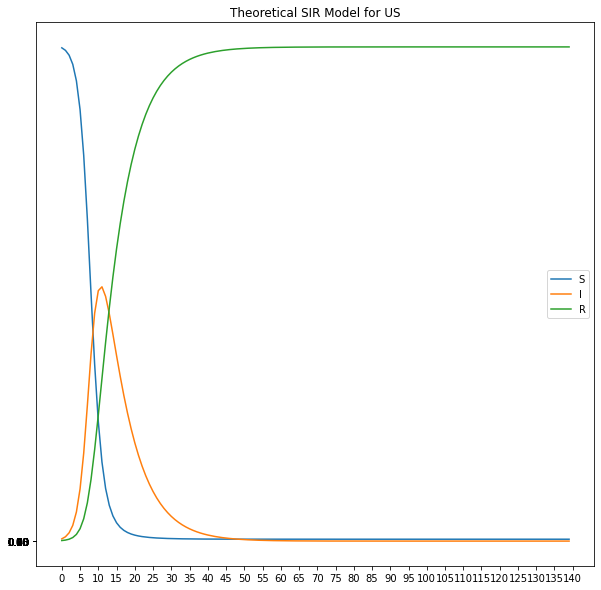

In [45]:
plt.figure()
plot = SIR_dataframe.plot(
    kind='line',
    figsize=(10, 10), xticks=np.arange(0, n_days+1, 5),
    yticks=np.arange(0.0, 1.00001, 0.05),
    title="Theoretical SIR Model for US")

We can do some complicated graph

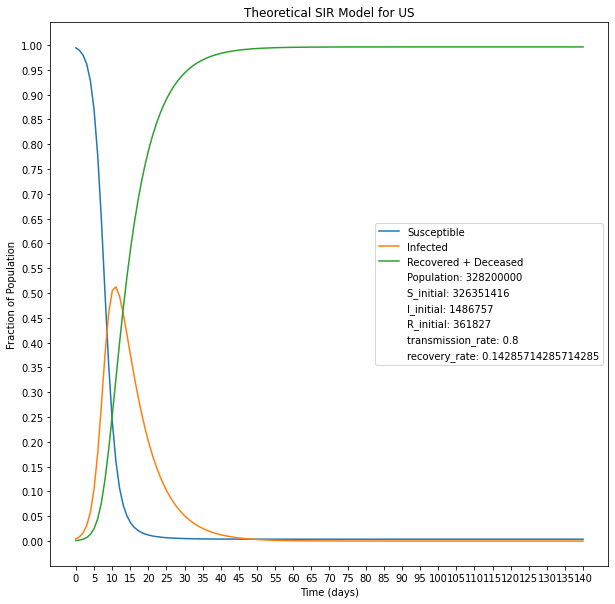

In [46]:
#Plot the model
plt.figure(figsize=(10, 10))
seaborn.lineplot(t, S/N, label="Susceptible")
seaborn.lineplot(t, I/N, label="Infected")
seaborn.lineplot(t, R/N, label="Recovered + Deceased")
plt.plot([],[], " ", label="Population: " + str(N))
plt.plot([],[], " ", label="S_initial: " + str(S_initial))
plt.plot([],[], " ", label="I_initial: " + str(I_initial))
plt.plot([],[], " ", label="R_initial: " + str(R_initial))
plt.plot([],[], " ", label="transmission_rate: " + str(transmission_rate))
plt.plot([],[], " ", label="recovery_rate: " + str(recovery_rate))
plt.xlabel("Time (days)")
plt.ylabel("Fraction of Population")
plt.title("Theoretical SIR Model for US")
plt.legend(loc="center right")
plt.xticks(np.arange(0, n_days+1, 5))
plt.yticks(np.arange(0.0, 1.00001, 0.05))
plt.show()

To run it all at once

In [47]:
def SIR(us_only, N, n_days, transmission_rate, recovery_rate):
    confirmed_so_far = us_only.Confirmed[-1]
    death_so_far = us_only.Death[-1]
    recovered_so_far = us_only.Recovered[-1]

    # The number of infected people (so far)
    I_initial = confirmed_so_far

    # removed = recovered + death (so far)
    R_initial = recovered_so_far + death_so_far

    # anyone that has not been infected, recovered, or died from COVID-19
    S_initial = N - I_initial - R_initial

    t = np.linspace(0, n_days, n_days)

    initial = S_initial, I_initial, R_initial

    # use scipy ODE integrate function to find the solution
    sol = scipy.integrate.odeint(SIR_model, initial, t, args=(N, transmission_rate, recovery_rate))
    S, I, R = sol.T

    plt.figure(figsize=(10, 10))
    seaborn.lineplot(t, S/N, label="Susceptible")
    seaborn.lineplot(t, I/N, label="Infected")
    seaborn.lineplot(t, R/N, label="Recovered + Deceased")
    plt.plot([],[], " ", label="Population: " + str(N))
    plt.plot([],[], " ", label="S_initial: " + str(S_initial))
    plt.plot([],[], " ", label="I_initial: " + str(I_initial))
    plt.plot([],[], " ", label="R_initial: " + str(R_initial))
    plt.plot([],[], " ", label="transmission_rate: " + str(transmission_rate))
    plt.plot([],[], " ", label="recovery_rate: " + str(recovery_rate))
    plt.xlabel("Time (days)")
    plt.ylabel("Fraction of Population")
    plt.title("Theoretical SIR Model for US")
    plt.legend(loc="center right")
    plt.xticks(np.arange(0, n_days+1, 5))
    plt.yticks(np.arange(0.0, 1.00001, 0.05))
    plt.show()

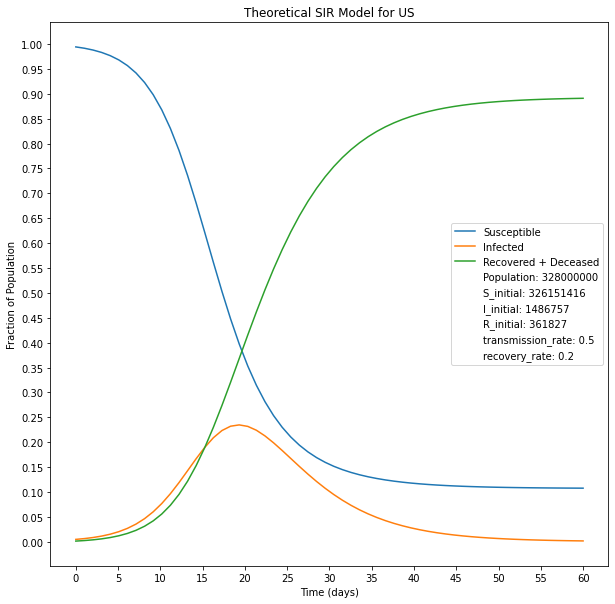

In [48]:
# we can set this later
transmission_rate = 0.5 #@param {type:"slider", min:0, max:1, step:0.1}

# check this with WHO
number_of_days_to_recover = 5 #@param {type:"slider", min:3, max:14, step:1}
recovery_rate = 1/number_of_days_to_recover

# of days to run the model
n_days = 60 #@param {type:"slider", min:30, max:150, step:10}

# total population, Allow 300 million to 400 million
N = 328000000 #@param {type:"integer", min:3e7, max:4e8, step:1e5}

SIR(us_only, N, n_days, transmission_rate, recovery_rate)

### SEIR Model

In [49]:
def SEIR_model(
        y,  # SEIR at time t
        t,  # time
        N,  # the total population
        beta,  # transmission rate
        gamma,  # recovery rate
        alpha):  # exposed to infected rate (incubation rate)
    S = y[0]
    E = y[1]
    I = y[2]
    R = y[3]

    # derivative of S with respect to time
    # this is going to be negative, because the number of suspected is going to go down over time
    # The rate of change of the # of suspected people
    dSdt = - (beta * S * I) / N

    # derivative of E with respect to time
    dEdt = (beta * S * I) / N - (alpha * E)

    # derivative of I with respect to time
    dIdt = (alpha * E) - (gamma * I)

    # derivative of R with respect to time
    dRdt = gamma * I

    return dSdt, dEdt, dIdt, dRdt

In [50]:
def SEIR(
        us_only,
        N,
        n_days,
        beta,
        gamma,
        alpha):
    infected_so_far = us_only.Confirmed[-1]
    death_so_far = us_only.Death[-1]
    recovered_so_far = us_only.Recovered[-1]

    # The number of infected people (so far)
    I_initial = infected_so_far

    # todo: The number of exposed at time (t)
    E_initial = infected_so_far * 3

    # removed = recovered + death (so far)
    R_initial = recovered_so_far + death_so_far

    # anyone that has not been infected, recovered, or died from COVID-19
    S_initial = N - I_initial - R_initial

    # time
    t = np.linspace(0, n_days, n_days)

    initial = S_initial, E_initial, I_initial, R_initial

    # use scipy ODE integrate function to find the solution
    sol = scipy.integrate.odeint(
        SEIR_model,
        initial,
        t, 
        args=(N, beta, gamma, alpha))
    S, E, I, R = sol.T

    plt.figure(figsize=(10, 10))
    seaborn.lineplot(t, S/N, label="Susceptible")
    seaborn.lineplot(t, E/N, label="Exposed")
    seaborn.lineplot(t, I/N, label="Infected")
    seaborn.lineplot(t, R/N, label="Recovered + Deceased")
    plt.plot([],[], " ", label="Population: " + str(N))
    plt.plot([],[], " ", label="S_initial: " + str(S_initial))
    plt.plot([],[], " ", label="E_initial: " + str(E_initial))
    plt.plot([],[], " ", label="I_initial: " + str(I_initial))
    plt.plot([],[], " ", label="R_initial: " + str(R_initial))
    plt.plot([],[], " ", label="beta: " + str(beta))
    plt.plot([],[], " ", label="gamma: " + str(gamma))
    plt.plot([],[], " ", label="alpha: " + str(alpha))
    plt.xlabel("Time (days)")
    plt.ylabel("Fraction of Population")
    plt.title("Theoretical SEIR Model for US")
    plt.legend(loc="center right")
    plt.xticks(np.arange(0, n_days+1, 5))
    plt.yticks(np.arange(0.0, 1.00001, 0.05))
    plt.show()

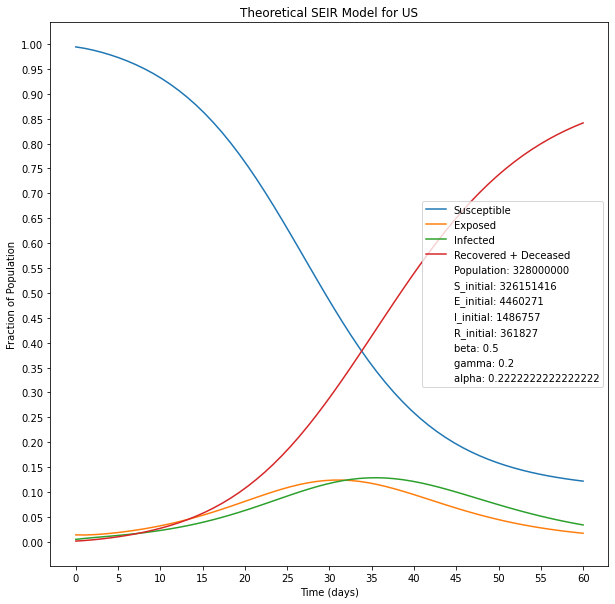

In [51]:
# we can set this later
beta = 0.5  # @param {type:"slider", min:0, max:1, step:0.1}

# check this with WHO
number_of_days_to_recover = 5  # @param {type:"slider", min:3, max:14, step:1}
gamma = 1 / number_of_days_to_recover

# CDC says 4-5 days, WHO says 5.2
Y = 4.5 # @param {type:"slider", min:3, max:14, step:0.2}
alpha = 1 / Y

# of days to run the model
n_days = 60  # @param {type:"slider", min:30, max:150, step:10}

# total population, Allow 300 million to 400 million
N = 328000000  # @param {type:"integer", min:3e7, max:4e8, step:1e5}

SEIR(
    us_only,
    N,
    n_days,
    beta,
    gamma,
    alpha)